# Wrangle & Analyze "WeRateDogs" Twitter Data

## Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)

<a id='intro'></a>
## Introduction

The purpose of this project is to demonsrtize the skills we learned in data wrangling part of Udacity Data Analysis Nanodegree program.

The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering Data

**1. Twitter archive file**

The file "twitter_archive_enhanced.csv" downloaded manually from Udacity resources   

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from functools import reduce
from datetime import datetime
import tweepy
import json
import re

pd.set_option('display.max_colwidth',-1)

In [20]:
# Load Twitter Archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# using tweet_id column as index
twitter_archive.set_index("tweet_id", inplace = True)
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

**2. Tweet image prediction**

**The tweet image predictions**
i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-prediction.tsv', 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)
    
image_prediction = pd.read_csv('image-prediction.tsv', sep = '\t')
image_prediction.set_index('tweet_id', inplace = True)
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API File**

Twitter API file contains tweet id, favorite count and retweet count. Data was provided by Udacity, downloaded manually then will be loaded from the tweet-json.txt file into a pandas data frame

In [7]:
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
twitter_api.set_index('tweet_id', inplace = True)
twitter_api.head()
    

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


<a id='assess'></a>
# Assessing Data

Assess data visually as well as programmatically using pandas for quality and tidiness issues.

### Assess: Twitter Archive

In [22]:
twitter_archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He requested to be carried around like that. 12/10 anything for Doc https://t.co/mWYACm4qnx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754247995392/photo/1,12,10,Doc,None,None,None,None
675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409102012420/photo/1,12,10,None,None,None,None,None
681981167097122816,NaN,NaN,2015-12-29 23:32:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jimothy. He's a Trinidad Poliwhirl. Father was a velociraptor. Exceptionally unamused. 12/10 would adopt https://t.co/VwdIk0OwVx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681981167097122816/photo/1,12,10,Jimothy,None,None,None,None
855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @frasercampbell_: oh my... what's that... beautiful scarf around your neck... 14/10 a h*ckin good dog in a h*ckin good game @GoodDogsGam…,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855122533267460096/photo/1,14,10,None,None,None,None,None


In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [24]:
twitter_archive.index.is_unique

True

In [25]:
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [26]:
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [27]:
twitter_archive.name.value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Oliver      11 
Cooper      11 
Tucker      10 
Penny       10 
Lola        10 
Winston     9  
Bo          9  
the         8  
Sadie       8  
Buddy       7  
an          7  
Bailey      7  
Toby        7  
Daisy       7  
Koda        6  
Leo         6  
Milo        6  
Jax         6  
Dave        6  
Scout       6  
Stanley     6  
Oscar       6  
Rusty       6  
Bella       6  
Jack        6  
Gus         5  
           ..  
Goliath     1  
Wesley      1  
Ole         1  
Dylan       1  
Kingsley    1  
Zoe         1  
Kaia        1  
Brutus      1  
Josep       1  
Shooter     1  
Walker      1  
Dunkin      1  
Katie       1  
Mike        1  
Jerome      1  
Marq        1  
Ruffles     1  
Keet        1  
Mairi       1  
Coopson     1  
Sage        1  
Jeffrie     1  
Binky       1  
Rambo       1  
Blipson     1  
Damon       1  
Henry       1  
Jomathan    1  
Ito         1  
Saydee      1  
Name: name, Length: 957,

In [28]:
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis=1)
    


In [29]:
twitter_archive['number_categories'].value_counts()

0    1976
1    366 
2    14  
Name: number_categories, dtype: int64

In [30]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [31]:
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


In [32]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [33]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"\d+\.\d*\/\d+")][['text', 'rating_numerator', 'rating_denominator']])
            

,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [35]:
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(4)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
669684865554620416,After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN
855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN
886736880519319552,"This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b","https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1"
840761248237133825,RT @dog_rates: Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps:/…,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1"


In [36]:
twitter_archive[twitter_archive.expanded_urls.str.contains(',',na=False)].expanded_urls.count()

639

#### Quality & Tidiness Issues in twitter_archive
- Delete columns that won't be used for analysis.
- The timestamp has an incorrect datatype - is an object, should be DateTime.
- some of the gathered tweets are replies and should be removed.
- some of the gathered tweets are retweets.
- Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.
- some dogs have more than one category assigned.
- Correct denominators other than 10.
- float ratings have been incorrectly read from the text of tweet.
- we have 639 expanded urls which contain more than one url address.

### Assess: Image Predictions

In [37]:
image_prediction.sample(10)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,0.049901,True
741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False


In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [39]:
sum(image_prediction.jpg_url.duplicated())

66

In [40]:
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [41]:
image_prediction.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [42]:
image_prediction.p1.sample(3)

tweet_id
798697898615730177    Labrador_retriever
805958939288408065    Irish_setter      
684200372118904832    llama             
Name: p1, dtype: object

In [43]:
image_prediction.p1_dog.count()

2075

#### Quality & Tidiness Issues in Image Predictions


- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.

- column names are confusing and do not give much information about the content.

- dog breeds contain underscores, and have different case formatting.

- only 2075 images have been classified as dog images for top prediction.

- 66 jpg_url duplicates were found.

- dataset should be merged with the twitter archive dataset.

### Assess: Twitter API data

In [44]:
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
757611664640446465,5026,1272
806576416489959424,5370,2230
673636718965334016,1194,404


In [45]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [46]:
twitter_archive.index.is_unique

True

#### Quality & Tidiness Issues in Twitter API Data


- twitter archive dataset has 2356 entries, while twitter API data has 2354.

- dataset should be merged with the twitter archive dataset.



<a id='clean'></a>
## Cleaning Data

Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

###  Clean: Twitter Archive Data

In [81]:
twitter_archive_clean = twitter_archive.copy()

In [82]:
twitter_archive_clean.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
704819833553219584,NaN,NaN,2016-03-02 00:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chesterson. He's a Bolivian Scoop Dog. Incredibly portable. Can't bark for shit tho. 7/10 would still pet https://t.co/EatAd8JhyW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704819833553219584/photo/1,7,10,Chesterson,0,0,0,0,0
817908911860748288,NaN,NaN,2017-01-08 01:40:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Looks like he went cross-eyed trying way too hard to use the force. 12/10 \nhttps://t.co/bbuKxk0fM8,NaN,NaN,NaN,https://twitter.com/micahgrimes/status/817902080979599361,12,10,None,0,0,0,0,0
802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,"https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1",13,10,None,0,0,0,0,0
708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending in non canines like this Guatemalan Twiggle Bunny. We only rate dogs. Only send in dogs... 11/10 https://t.co/XKhobeGuvT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923141795840/photo/1,11,10,None,0,0,0,0,0
818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Wafer. He represents every fiber of my being. 13/10 very good dog https://t.co/I7bkhxBxUG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210458333184/photo/1,13,10,Wafer,0,0,0,0,0


**Define**

Some of the gathered tweets are replies and retweets

- remove retweets data from the dataset
- remove columns with retweet and replies information


**Code**

In [83]:
twitter_archive_clean.shape

(2356, 17)

In [84]:
# drop retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [85]:
# Test
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [86]:
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [87]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [88]:
twitter_archive_clean.shape

(2175, 12)

In [89]:
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
684830982659280897,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This little fella really hates stairs. Prefers bush. 13/10 legendary pupper https://t.co/e3LPMAHj7p,https://vine.co/v/eEZXZI1rqxX,13,10,None,0,0,1,0,1
849412302885593088,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Noosh. He noticed you were in the shower and thought you could use some company. 12/10 h*ckin loyal https://t.co/Uq3ChFgWA3,"https://twitter.com/dog_rates/status/849412302885593088/photo/1,https://twitter.com/dog_rates/status/849412302885593088/photo/1,https://twitter.com/dog_rates/status/849412302885593088/photo/1,https://twitter.com/dog_rates/status/849412302885593088/photo/1",12,10,Noosh,0,0,0,0,0
696100768806522880,2016-02-06 22:38:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This poor pupper has been stuck in a vortex since last week. Please keep her in your thoughts. 10/10 https://t.co/7ODQWHwYDx,https://vine.co/v/i1KWj0vbvA9,10,10,None,0,0,1,0,1


**Define**

- Dog classification (doggo, floofer, pupper or puppo) should be one column. 
- Some dogs have more than one category assigned.


**Code**

In [90]:
twitter_archive_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0


In [91]:
# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)


In [92]:
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
718460005985447936,2016-04-08 15:26:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Bowie. He's listening for underground squirrels. Smart af. Left eye is considerably magical. 9/10 would so pet https://t.co/JyNmyjy3fe,https://twitter.com/dog_rates/status/718460005985447936/photo/1,9,10,Bowie,0,NaN
720775346191278080,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,https://twitter.com/dog_rates/status/720775346191278080/photo/1,10,10,Berkeley,0,NaN
687480748861947905,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Another magnificent photo. 12/10 https://t.co/X5w387K5jr,https://twitter.com/dog_rates/status/687480748861947905/photo/1,12,10,None,0,NaN


In [73]:
# twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['timestamp', 'source',
#       'text', 'expanded_urls', 'rating_numerator',
#       'rating_denominator', 'name','number_categories'],
#                           var_name='dog_type', value_name='type')
                           
# twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.type != 0]

In [74]:
# twitter_archive_clean = twitter_archive_clean.drop('type', axis=1)
# twitter_archive_clean.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,type
5985,2015-12-15 04:19:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I promise this wasn't meant to be a cuteness overload account but ermergerd look at this cozy pupper. 13/10 https://t.co/mpQl2rJjDh,https://twitter.com/dog_rates/status/676617503762681856/photo/1,13,10,None,1,pupper,1
5229,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Edmund. He sends stellar selfies. Cute af. 8/10 would totally snapchat with this pupper https://t.co/PprXoqZuKY,https://twitter.com/dog_rates/status/742150209887731712/photo/1,8,10,Edmund,1,pupper,1
6141,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,1,pupper,1


**Define**

The timestamp has an incorrect datatype - is an object, should be DateTime

- convert to datetime.


**Code**

In [93]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [94]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
number_categories     2175 non-null int64
dog_type              385 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 249.9+ KB


**Define**

Float ratings have been incorrectly read from the text of tweet

- gather correct rating when rating is a fraction.


**Code**

In [95]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [96]:
# display sample of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,10.0,9.50
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10.0,11.26
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10.0,13.50


**Define**

Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. The fact that the rating numerators are greater than the denominators does not need to be cleaned, however I will introduce a normalized rating which will be easier to plot.

- fix incorrectly read ratings
- add normalized rating


**Code**

In [98]:
# save index of tweets with denominator greater than 10
high_denominator = twitter_archive[twitter_archive.rating_denominator > 10].index

# display sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,rating_denominator,rating_numerator
tweet_id,,,
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
832088576586297345,@docmisterio account started on 11/15/15,15.0,11.0
682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11.0,7.0


In [99]:
# fix rating manually for tweets for which rating was read incorrectly
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [100]:
# display sample of fixed rating
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",20.0,4.0
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,10.0,11.0


In [101]:
# add normalized rating
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [102]:
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
tweet_id,,,,
749417653287129088,This is Finn. He's the most unphotogenic pupper of all time. 11/10 https://t.co/qvA2rCUl6v,10.0,11.0,1.1
846042936437604353,Meet Jarvis. The snow pupsets him. Officially ready for summer. 12/10 would perform a chilly boop https://t.co/0hLkztpiOW,10.0,12.0,1.2
688519176466644993,This pupper is sprouting a flower out of her head. 12/10 revolutionary af https://t.co/glmvQBRjv4,10.0,12.0,1.2
707629649552134146,We usually don't rate marshmallows but this one's having so much fun in the snow. 10/10 (vid by @kylejk24) https://t.co/NL2KwOioBh,10.0,10.0,1.0
667443425659232256,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,10.0,6.0,0.6



**Define**

We have 639 expanded urls which contain more than one url address and 59 missing expanded urls

- build correct links by using tweet id


**Code**

In [103]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    
# Test
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating
tweet_id,,,,,,,,,,
825147591692263424,2017-01-28 01:04:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sweet Pea. She hides in shoe boxes and waits for someone to pick her. Then she surpuprises them. 13/10 https://t.co/AyBEmx56MD,https://twitter.com/dog_rates/status/825147591692263424,13.0,10.0,Sweet,0.0,NaN,1.3
778650543019483137,2016-09-21 17:42:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Strider. He thinks he's a sorority girl. Already wants to go to NYC for a weekend to say he's ""studied abroad"" 10/10 https://t.co/KYZkPuiC1l",https://twitter.com/dog_rates/status/778650543019483137,10.0,10.0,Strider,0.0,NaN,1.0
744334592493166593,2016-06-19 01:02:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Blanket. She has overthrown her human. Demands walks like this every hour on the hour. 11/10 so damn fluffy https://t.co/hrJugNHs2Z,https://twitter.com/dog_rates/status/744334592493166593,11.0,10.0,Blanket,0.0,NaN,1.1


###  Clean: Image Predictions Data

In [105]:
image_prediction_clean = image_prediction.copy()
image_prediction_clean.sample(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,0.100452,True
752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True


**Define**

- Columns names are confusing and do not give much information about the content.

- Change column names to more descriptive ones.


**Code**

In [106]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

In [107]:
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

**Define**

Dog breeds contain underscores, and have different case formatting

- Replace underscores with whitespace
- Capitalize the first letter of each word


**Code**

In [108]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

In [109]:
# display sample of changes
image_prediction_clean[dog_breed_cols].sample(5)

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
666082916733198337,Pug,Bull Mastiff,French Bulldog
667211855547486208,Golden Retriever,Labrador Retriever,Kuvasz
674800520222154752,Pembroke,Cardigan,Dingo
693647888581312512,Washbasin,Doormat,Bathtub
835264098648616962,Hyena,Chesapeake Bay Retriever,Meerkat


**Define**

Drop 66 image_url duplicated


**Code**

In [111]:
#disply jpg_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

In [112]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

#TEST
sum(image_prediction_clean['image_url'].duplicated())

0

**Define**

Only 2075 images have been classified as dog images for top prediction

If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.


**Code**

In [113]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# drop old columns
image_prediction_clean.drop(['1st_prediction',
                       '1st_prediction_confidence',
                       '1st_prediction_isdog',
                       '2nd_prediction',
                       '2nd_prediction_confidence',
                       '2nd_prediction_isdog',
                       '3rd_prediction',
                       '3rd_prediction_confidence',
                       '3rd_prediction_isdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

In [114]:
image_prediction_clean.sample(3)

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
749036806121881602,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,West Highland White Terrier,0.019522
841680585030541313,https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg,1,Chihuahua,0.547401
798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,Beagle,0.636169


###  Clean: Twitter API Data

In [115]:
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
669354382627049472,2889,1390
811744202451197953,8429,1884
755110668769038337,23446,12621


The dataset looks clean so there is no need to perform cleaning tasks, 
except for merging it with the Twitter archive data, which is covered in the next section.

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

### Storing

Merge all the three datasets and Store the clean DataFrame(s) in the CSV file ***twitter_archive_master.csv***

In [118]:
# join datasets
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

In [119]:
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
750011400160841729,2016-07-04 17:00:26,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM,https://twitter.com/dog_rates/status/750011400160841729,11.0,10.0,Piper,1.0,Doggo,1.1,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,Boston Bull,0.087150,3568,1035
709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416,45.0,50.0,None,0.0,NaN,0.9,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,Borzoi,0.490783,2634,721
843604394117681152,2017-03-19 23:25:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hank. He's been outside for 3 minutes and already made a friend. Way to go Hank. 11/10 for both https://t.co/wHUElL84RC,https://twitter.com/dog_rates/status/843604394117681152,11.0,10.0,Hank,0.0,NaN,1.1,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador Retriever,0.430583,18310,3081


In [120]:
# display basic data summary
df.describe()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,11.391009,10.522140,0.159287,1.081431,1.216482,0.550305,8603.169127,2555.534440
std,8.021945,7.000207,0.379266,0.187995,0.577420,0.300083,11700.108745,4301.337243
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.302321,2091.250000,622.250000
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550604,4162.500000,1363.000000
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.822939,10857.250000,2992.500000
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000


Looking at the basic statistics, we see that the rating 11/10 is the most common one. When it comes to the quality of dog breed predictions, the average confidence of ~50% suggests we might expect a lot of misclassified dogs. On the good side, the average value of favorites and retweets allow us to understand better how popular weRateDogs profile is. Average of 8603 favorites and 2555 retweets is impressive.

### Insight one
**Most common dog Breed**

An interesting information is the dog breed. This information comes from the image predictions file, which we merged with the tweeter archive at Storing section. Dog breeds were generated by running images through the neural network that can classify breeds of dogs.

In [122]:
# Display the number for each dog's breed 
df['breed_predicted'].value_counts()

Golden Retriever                  143
Labrador Retriever                103
Pembroke                          94 
Chihuahua                         87 
Pug                               60 
Toy Poodle                        50 
Chow                              45 
Pomeranian                        42 
Samoyed                           38 
Malamute                          32 
Chesapeake Bay Retriever          31 
French Bulldog                    30 
Cocker Spaniel                    26 
Miniature Pinscher                24 
Eskimo Dog                        22 
German Shepherd                   21 
Shih-Tzu                          20 
Staffordshire Bullterrier         20 
Siberian Husky                    20 
Rottweiler                        19 
Shetland Sheepdog                 19 
Cardigan                          19 
Maltese Dog                       19 
Beagle                            19 
Kuvasz                            18 
Basset                            17 
Italian Grey

In [127]:
def plot_barh(x,y,title='',xlabel='',ylabel='',rotation=0):
    plt.figure(figsize=(8,5))
    bar_list = plt.barh(x,y,color='#3F5D7D', edgecolor = 'k')
    plt.title(title,fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    return plt.show()

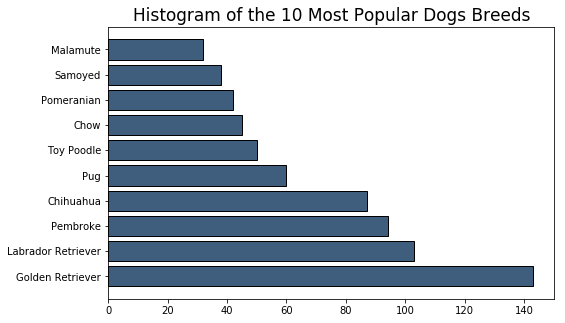

In [128]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Histogram of the 10 Most Popular Dogs Breeds")

**Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!**

### Insight 2
**Average rating among dog Breeds**

In [129]:
df_dog_type_mean = df.groupby('breed_predicted').mean()
df_dog_type_mean.head()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
breed_predicted,,,,,,,,
Afghan Hound,8.000000,10.0,0.000000,0.800000,1.000000,0.513621,12191.500000,3602.5000
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500
American Staffordshire Terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125
Appenzeller,11.000000,10.0,0.000000,1.100000,1.000000,0.503665,7317.500000,1458.0000
Australian Terrier,11.500000,10.0,0.000000,1.150000,2.000000,0.307584,11127.500000,3078.5000


In [130]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

breed_predicted
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Soft-Coated Wheaten Terrier    0.880000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
Tibetan Terrier                0.925000
Dalmatian                      0.927273
Boston Bull                    0.941667
Welsh Springer Spaniel         0.950000
Saint Bernard                  0.950000
Maltese Dog                    0.952632
Dandie Dinmont                 0.957143
Norwich Terrier                0.960000
Miniature Schnauzer            0.960000
Redbone                        0.966667
English Setter                 0.971429
Scottish Deerhound             0.975000
Rhodesian Ridgeback            0.975000
Irish Terrier                  0.980000
Airedale                       0.983333
Papillon                       0.983333
Newfoundland                   0.985714
Mexican Hairless               0.985714
Miniature Poodle               0.987500
Miniature Pinscher      

### Insight 3
**Account Popularity over Time**

Account Popularity based on the numbers of Favorites and Retweets over time.

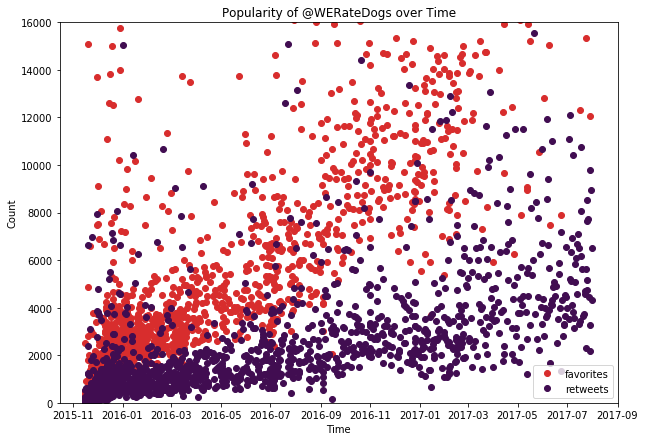

In [131]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#d82d2d")
ax.plot_date(d,df.retweets, color="#410d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()

**The page gained popularity over time as it is clear in the above graph.
We see an upward trend in the number of favorites and retweets. We can suppose that tweets were getting more and more favorites and retweets as WeRateDog account was becoming more and more popular.**

### Insight 5
**Dog Types**

WeRateDogs classifies dogs into one of four stages: doggo, pupper, puppo, and floof(er).Let's check how many dogs we have for each category.

In [132]:
df.dog_type.value_counts()

Pupper     184
Doggo      62 
Puppo      25 
Floofer    8  
Name: dog_type, dtype: int64

In [133]:
# bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    plt.figure(figsize=(9,6)) 
    bar_list = plt.bar(x, y, color="#173c8c", edgecolor="k", width=width)
    plt.title(title,
              fontsize=18)
    plt.xlabel(xlabel,
               fontsize=15)
    plt.ylabel(ylabel,
               fontsize=15)
    return plt.show()

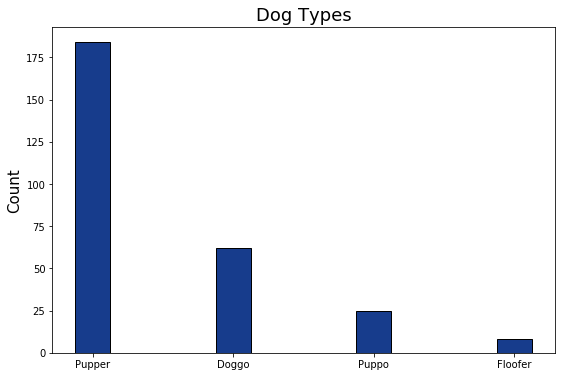

In [134]:
# plot dog types
dog_types = pd.DataFrame(df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25, 
         title="Dog Types", 
         ylabel="Count")

**Pupper is the most common dog category, followed by Doggo. Floofer is very rare.**

### Insight 4
WeRateDogs rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

In [135]:
# line plot function
def plot_line(x, y, title="", xlabel="", ylabel="", marker=None, linestyle="-", xlim=None, ylim=None, xrotation=0):
    
    plt.figure(figsize=(10, 7))   

    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.5, color="#9b2e2e")

    plt.yticks(fontsize=14)    
    plt.xticks(fontsize=14, rotation=xrotation)   

    if xlim is None:
        plt.xlim()
    else:
        plt.xlim(xlim)

    if ylim is None:
        plt.ylim()
    else:
        plt.ylim(ylim)
    
    plt.plot(x, y, marker=marker, linestyle=linestyle, color="#9b2e2e")

    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=14)
    
    plt.ylabel(ylabel,
               fontsize=14)

    return plt.show()

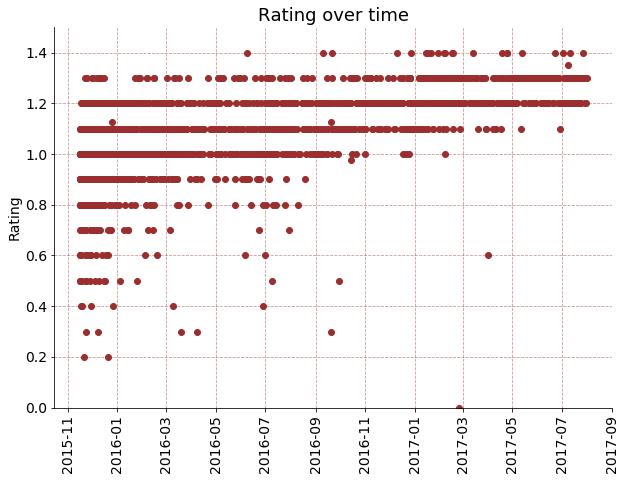

In [136]:
# plot rating over time
plot_line(df.timestamp, 
          df.rating,
          title="Rating over time", 
          ylabel="Rating", 
          marker='o', 
          linestyle='', 
          ylim=(0,1.5), 
          xrotation=90)

**At the beginning of the account activity, the lower ratings were more frequent.**                 

**With the elapse of time, less and less dogs received a low rating, and more and more high.**